In [1]:
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
from time import time
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [2]:
class ImageConv(nn.Sequential):
    def __init__(self):
        super().__init__(                                   # B 1   28  28
            nn.BatchNorm2d(num_features=1),
            nn.Conv2d(1, 64, 3, stride=1, padding=3),       # B 64  32  32  
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 64, 3, stride=1, padding=1),      # B 64  32  32
            nn.LeakyReLU(0.2, inplace=True),
            nn.MaxPool2d(2, stride=2, padding=0),           # B 64  16  16
            nn.Dropout2d(0.2, inplace=True),
            nn.BatchNorm2d(num_features=64),
            nn.Conv2d(64, 128, 3, stride=1, padding=1),     # B 128 16  16
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 128, 3, stride=1, padding=1),    # B 128 16  16
            nn.LeakyReLU(0.2, inplace=True),
            nn.MaxPool2d(2, stride=2, padding=0),           # B 128 8   8
            nn.Dropout2d(0.2, inplace=True),
            nn.BatchNorm2d(num_features=128),
            nn.Conv2d(128, 256, 3, stride=1, padding=1),    # B 256 8   8
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 256, 3, stride=1, padding=1),    # B 256 8   8
            nn.LeakyReLU(0.2, inplace=True),
            nn.MaxPool2d(2, stride=2, padding=0),           # B 256 4   4
            nn.Dropout2d(0.2, inplace=True),
            nn.BatchNorm2d(num_features=256),
            nn.Conv2d(256, 512, 3, stride=1, padding=1),    # B 512 4   4
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(512, 512, 3, stride=1, padding=1),    # B 512 4   4
            nn.LeakyReLU(0.2, inplace=True),
            nn.MaxPool2d(2, stride=2, padding=0),           # B 512 2   2
            nn.Dropout2d(0.2, inplace=True)
        )

In [3]:
def get_batches(X, y=None, batch_size=128, shuffle=True):
    if y is not None:
        assert X.shape[0] == y.shape[0]

    num_batches = int(np.ceil(X.shape[0] * 1.0 / batch_size))

    if shuffle:
        indices = np.random.permutation(X.shape[0])
        X = X[indices]
        if y is not None:
            y = y[indices]

    for batch in range(num_batches):
        start = batch * batch_size
        end = min((batch + 1) * batch_size, X.shape[0])
        yield (batch, X[start:end], y[start:end]) if y is not None else (batch, X[start:end])

In [4]:
def draw(images, texts, columns=1, rows=1):
    fig = plt.figure(figsize=(2 * columns, 2 * rows))

    for i in range(columns * rows):
        ax = fig.add_subplot(rows, columns, i + 1)
        ax.set_title(texts[i])
        ax.set_aspect('equal')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.imshow(images[i].reshape((28, 28)))

    cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.set_frame_on(False)
    plt.show()

In [5]:
X, y = fetch_openml(name='mnist_784', return_X_y=True)

In [6]:
y = y.astype('int32')

In [7]:
X = X.reshape((X.shape[0], 28, 28)).astype('float32')
X.shape

(70000, 28, 28)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)
(X_train.shape, X_test.shape, X_val.shape), (y_train.shape, y_test.shape, y_val.shape)

(((50400, 28, 28), (14000, 28, 28), (5600, 28, 28)),
 ((50400,), (14000,), (5600,)))

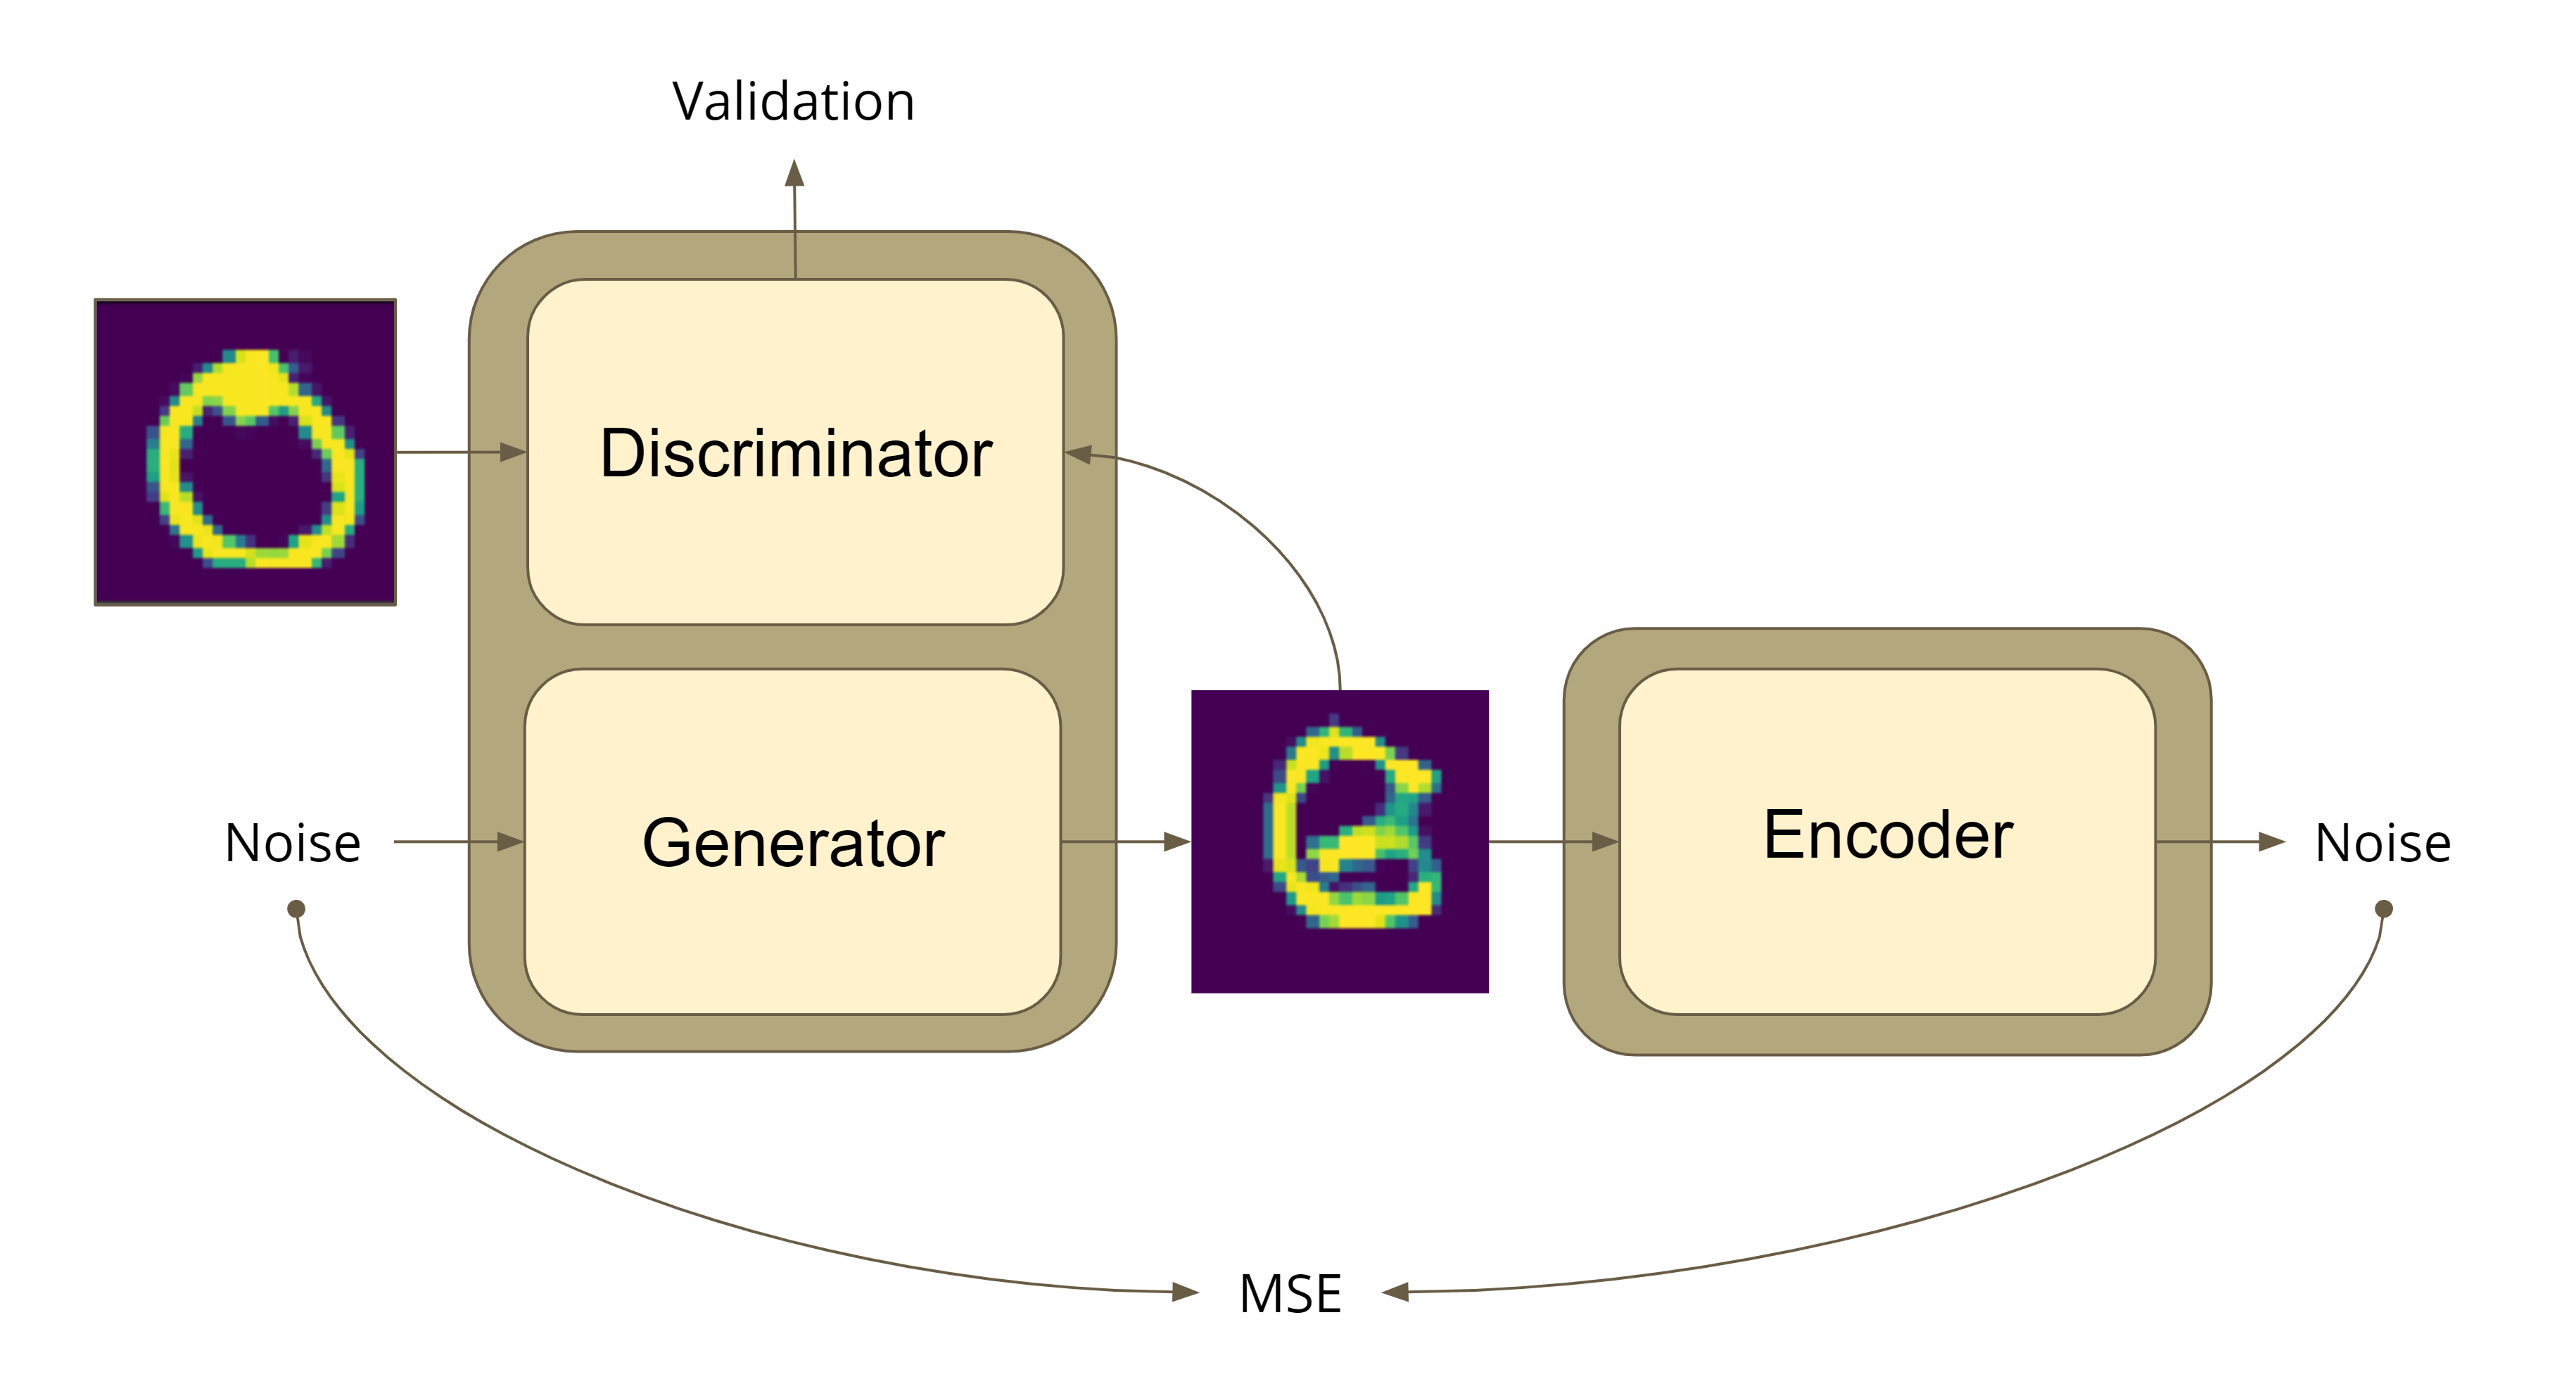